**Foreslået ændringer**  
Der er ikke meget, som skal ændres i denne Notebook. Vi skal sandsynligvis tilpasse den til at overholde de nye konventioner, som vi sætter for os selv. Dvs tænke over import og lign.. Ellers burde den være good to go

# Flere metoder i Linær Algebra
Målet for denne notebook er at give en oversigt over de funktioner, som man kan få brug for, når man benytter SymPy som redskab i lineær algebra. Vi arbejder videre hvor den første notebook om lineær algebra slap, så fra starten antager vi at læseren kan lave matrix- og vektormanipulationer. 

Langt de fleste funktioner i denne notebook virker på samme måde som matrixinversion, som for en matrix $A$ findes ved <code>A.inv()</code>.

Først importerer vi de rette pakker:

In [1]:
import sympy as sp              # Importer sympy 
sp.init_printing()              # Flot print

from sympy import pi, oo, I     # Symboler, som det er smart at have klar
from sympy import Matrix        # Vi kommer til at lave mange matricer i denne notebook

from IPython.display import display

## Transponering, adjungering og konjugering
Hvis vi har givet en matrix, kan vi nemt beregne den transponerede matrix med at ombytte rækker og kolonner:

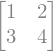

In [2]:
A = Matrix([[1, 2], [3, 4]]);
display(A)

Den transponerede beregnes med <code>.T</code>

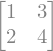

In [3]:
A.T    # Bemærk, at der ikke skal parenteser bag T

Messer arbejder ikke med komplekse tal som indgange i matricer, men hvis man gør (og det er der mange gode grunde til, f.eks. i kvantemekanik), vil man også møde den såkaldte konjugerede matrix <code>A.conjugate()</code> (der fremkommer ved kompleks konjugering af indgangene af $A$) og den såkaldte adjungerede (matricen der er $A$s transponerede konjugerede matrix) <code>A.adjoint()</code> eller nemmere <code>A.H</code> . Notationen med H kommer af at den adjungerede matrix også kaldes den hermitisk konjugerede.
Eksempelvis kan vi finde den konjugerede matrix her:

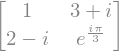

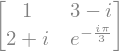

In [4]:
A = Matrix([[1, 3+I], [2-I, sp.exp(I*pi/3)]])
display(A)
A.conjugate()

hvor vi ser at alle imaginærdelene har skiftet fortegn.
Som eksempel på den adjungerede (altså komplekst konjugerede og transponerede) matrix får vi

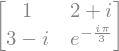

In [5]:
A.H     # Som med .T indeholder syntaksen ikke ()

## Nulrum og søjlerum
For en matrix $M$ kan vi finde dennes nulrum og søjlerum ved at bruge hhv. <code>M.nullspace()</code> og <code>M.columnspace()</code>. 

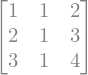

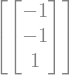

In [6]:
M = Matrix([[1, 1, 2], [2, 1, 3], [3, 1, 4]])
display(M)
display(M.nullspace())

Hvilket giver en liste (her med eet element) af vektorer som er basis for matricens nulrum. Altså vektorer som opfylder ligningen $M\boldsymbol{x} = \boldsymbol{0}$. Dette gælder derfor også for linearkombinationer af vektorerne i nulrummet.

Søjlerummet findes helt tilsvarende:

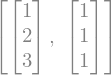

In [7]:
display(M.columnspace())

Herved får vi en liste af vektorer, som udspænder søjlerummet, og som består af de søjler fra $M$, der indeholder ledende indgange når $M$ er bragt på række-echelonform. Dette verificerer vi ved at betragte $M$s ækvivalente matrix på reduceret række-echelonform:

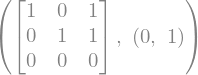

In [8]:
M.rref()

## Gram-Schmidt-ortogonalisering

Er vi givet flere vektorer i rummet som ikke er lineært afhængigt af hinanden, kan vi danne et ortogonalt (og evt. ortonomalt, hvis vi normaliserer vektorerne) sæt af vektorer ved at bruge Gram-Schmidt-ortogonalisering. 

Dette kan være en ret omgangsrig procedure, som man i LinALys kun vil blive bedt om at udføre i relativt simple tilfælde. Men selv i disse simple tilfælde er der masser af muligheder for at lave regnefejl, og det kan derfor være rart hurtigt at kunne checke beregningerne, især for når der er tale om mere end 2-3 vektorer. Til dette importerer man <code>GramSchmidt</code> fra <code>sympy.matrices</code> og benytter den på en liste $L$ af vektorer: <code>GramScmidt(L)</code>. Som udgangspunkt normaliserer SymPy ikke de ortogonaliserede vektorer, men hvis vi giver funktionen et ekstra argument <code>GramSchmidt(L, True)</code>, fortages normaliseringen som en del af beregningen. 

Som eksempel genregner vi her eksemplet fra side 162 i Messer med SymPy:

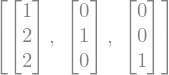

In [9]:
from sympy.matrices import GramSchmidt

# Definer en liste med matrix indgange, som nu er vektorer
L = [Matrix([1, 2, 2]), Matrix([0, 1, 0]), Matrix([0, 0, 1])]
display(L)

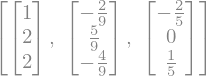

In [10]:
# Vi benytter nu GramScmidt
GramSchmidt(L)

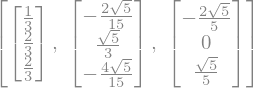

In [11]:
# Eller hvis vi vil inkluderer en normalisering gør vi følgende:
GramSchmidt(L, True)

hvilket kan ses at passe med Messers 

$$\left\{ \left(\frac{1}{3}, \frac{2}{3}, \frac{2}{3}\right), \left(\frac{-2}{\sqrt{45}}, \frac{5}{\sqrt{45}}, \frac{-4}{\sqrt{45}}\right),\left(\frac{-2}{\sqrt{5}}, 0, \frac{1}{\sqrt{5}}\right)\right\}$$

ved anvendelse af kvadratrods- og brøkregneregler.

## Determinant
Determinanten beregnes ved at tilføje <code>.det()</code> til matricens navn:

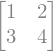

In [12]:
A = Matrix([[1, 2], [3, 4]])
display(A)
A.det()

Vi kan også beregne determinanten for en symbolsk matrix:

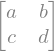

In [13]:
from sympy.abc import a, b, c, d

B = Matrix([[a, b], [c, d]])
display(B)

B.det()

i overensstemmelse med, hvordan vi selv ville regne den.

## Sporet / Trace
Sporet udregnes ved at tilføje <code>.trace()</code> til den ønskede matrix, hvilket giver summen af diagonalindgangene:

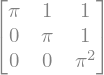

In [14]:
A = Matrix([[pi, 1, 1],[0, pi, 1],[0, 0, pi**2]])
display(A)
A.trace()

## Krydsprodukt, vektorprodukt / Cross product
For to vektorer i tre dimensioner kan vi benytte beregne krydsproduktet mellem <code>v</code> og <code>w</code> med <code>v.cross(w)</code> (i analogi med syntaksen for det indre produkt):

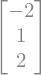

In [15]:
v = Matrix([1, 0, 1])
w = Matrix([1, 2, 0])
display(v, w)

display(v.cross(w))

## Egenværdier og -vektorer
For en matrix findes egenværdier og -vektorer med <code>A.eigenvals()</code> og <code>A.eigenvects()</code>.

<code>A.eigenvals()</code> giver os blot alle egenværdierne til en bestemt matrice i sorteret rækkefølge:

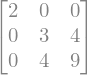

In [16]:
A = Matrix([[2, 0, 0], [0, 3, 4], [0, 4, 9]])
display(A)

In [17]:
A.eigenvals()

Dette giver os nu en liste over egenværdierne (altså, 1, 2 og 11) og deres algebraiske multiplicitet, altså hvor mange gange den pågældende egenværdi er rod i det karakteristiske polynomium (her har alle egenværdierne algebraiske multiplicitet 1). For at illustrere hvordan resultaterne vises, "beregner" vi her egenværdierne for et trivielt eksempel:

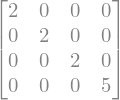

In [18]:
from sympy.matrices import eye
B = Matrix([[2, 0, 0, 0], [0, 2, 0, 0], [0, 0, 2, 0], [0, 0, 0, 5]])
display(B)

In [19]:
A.eigenvals()

Funktionen <code>.eigenvects</code> virker på samme måde og giver både egenværdier og -vektorerne:

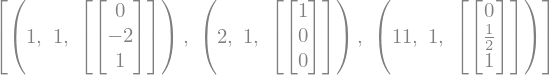

In [20]:
A.eigenvects()

Her er resultatet altså givet som en liste med (egenværdi, multiplictet, egenvektorer). Vi kan igen prøve eksemplet med det trivielle eksempel for at vise, hvad der sker, når en egenværdi har flere tilhørende egenvektorer:

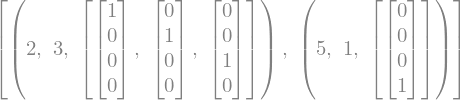

In [27]:
B.eigenvects()

I matematikkurser har matricerne gerne pæne (ofte heltallige) egenværdier, mens man i praksis sjældent oplever matricer med så velopdragne egenværdier. Dertil kommer, at store matricer kan gøre det meget hårdt for computeren at regne det hele symbolsk. Derfor vil man (når man eksempelvis beregner egenværdier i kvantemekanik) i stedet bruge NumPy, da der her er nogle ret hurtige implementeringer til at give gode numeriske løsninger. Heldigvis ligner metoderne meget hinanden, og hvis man skulle komme ud for at skulle løse et problem, der er for krævende med sumbolske beregninger, kan man finde NumPys LinAlg værktøjer [i den relevante dokumentation](https://numpy.org/doc/stable/reference/routines.linalg.html).

## Diagonalisering
En afgørende pointe i kurset er at undersøge hvornår der kan findes en base hvor vores matrix $A$ er på diagonalform, altså hvornår der findes en matrix $P$, der opfylder: $D = P^{-1}AP$, hvor $D$ er en diagonalmatrix. For at finde denne kan vi benytte <code>A.diagonalize()</code>. Vi regner videre med matricen <code>A</code> defineret ovenfor:

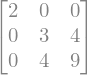

In [22]:
display(A)

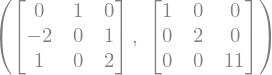

In [23]:
A.diagonalize()

Outputtet for denne funktion er matricerne $P$ og $D$. Vi genkender at matricen $D$ netop indeholder egenværdierne langs diagonalen og at $P$ består at (multipla af) egenvektorerne. Vi kan få de pågældende matricer ud så vi kan regne videre med dem på følgende måde:

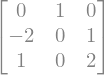

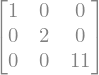

In [24]:
(P, D) = A.diagonalize()
display(P, D)

Og vi demonstrerer endelig at matricerne sammensættes som forventet. Først $D = P^{-1}AP$:

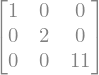

In [25]:
P.inv() * A * P

Eller omvendt $A = P D P^{-1}$

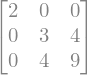

In [26]:
P * D * P.inv()